In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## Initializing a Graph

In this example, we generate a random graph using the **Erdős-Rényi (ER) model**, denoted as $G(n, p)$. This model constructs a graph with:

- $n$ nodes (vertices),
- Each possible edge between two nodes appearing independently with probability $p$.

Mathematically, the Erdős-Rényi model is defined as:

$$P(G) = p^m (1 - p)^{\binom{n}{2} - m}$$

where $m$ is the number of edges in the generated graph.

The Erdős-Rényi model is widely used in network science to study **random graph properties**, such as connectivity, clustering, and the emergence of a giant component.

For further reading, see:

- Erdős, P., & Rényi, A. (1959). _On Random Graphs_. Publicationes Mathematicae, **6**, 290–297.
- Bollobás, B. (2001). _Random Graphs_. Cambridge University Press.

The generated graph is displayed using `networkx`, where each edge is randomly assigned based on the given probability.


In [11]:
# RANDOM GRAPH

# Number of nodes (n)
num_nodes = 10
# Probability of edge creation (p)
prob_edge = 0.2

# Random graph: Erdos-Renyi model
graph = nx.erdos_renyi_graph(num_nodes, prob_edge)

graph

## Visualizing the Graph

We use `networkx.draw()` to visualize the generated graph. Key parameters:

- `with_labels`: Displays node labels.
- `node_size`: Sets node sizes for better visibility.
- `font_size`: Adjusts font size for readability.

The visualization provides an intuitive way to understand the structure of the random graph.


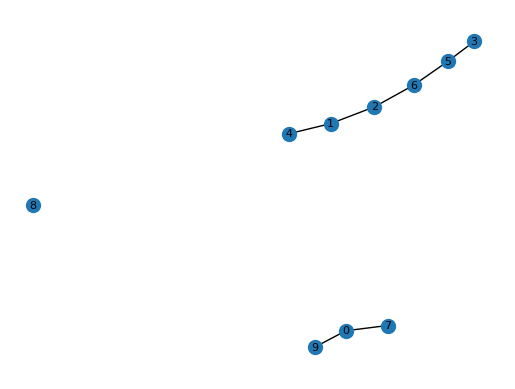

In [12]:
# Draw the network
fig, ax = plt.subplots()
nx.draw(graph, ax=ax, with_labels=True, node_size=100, font_size=8)
plt.show(fig)
plt.close(fig)

## Properties


### Degree Distribution and Highest-Degree Node

The **degree** of a node in a graph is the number of edges connected to it. The degree distribution provides insights into how connections are spread across the network.

The average degree is then defined as:
$$\langle k \rangle = \frac{1}{n} \sum_{i=1}^{n} k_i$$
where $k_i$ is the degree of node $i$.

We visualize the graph while displaying these key metrics. The **average degree** is important in network theory as it influences network connectivity and robustness.


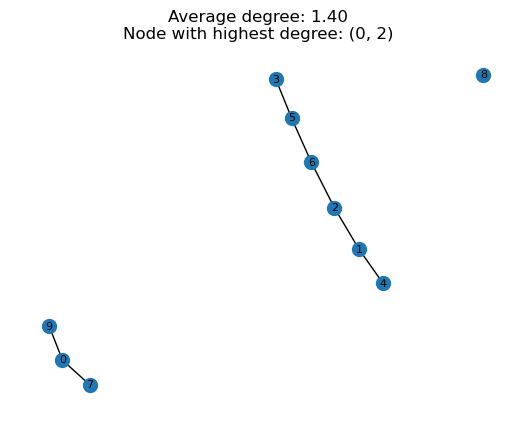

In [13]:
# Degrees = number of neighbors of each node
degrees = [d for _, d in graph.degree()]
# Average degree = average number of neighbors of the nodes
avg_degree = np.mean(degrees)
# Node with the highest degree
node_highest_degree = max(graph.degree, key=lambda x: x[1])

# Draw the network
fig, ax = plt.subplots()
nx.draw(graph, ax=ax, with_labels=True, node_size=100, font_size=8)
ax.set_title(
    f"Average degree: {avg_degree:.2f}\nNode with highest degree: {node_highest_degree}"
)
plt.show(fig)
plt.close(fig)

### Clustering Coefficient

The **clustering coefficient** measures the tendency of nodes to form tightly knit groups, quantifying the presence of triangles in the network. It is computed as:

$$C_i = \frac{2 T_i}{k_i (k_i - 1)}$$

where:

- $T_i$ is the number of triangles (closed triplets) node $i$ is part of.
- $k_i$ is the degree of node $i$.

The **average clustering coefficient** is given by:

$$C = \frac{1}{n} \sum_{i=1}^{n} C_i$$

A higher clustering coefficient suggests that nodes tend to form local communities. We visualize the network along with its computed clustering coefficient.


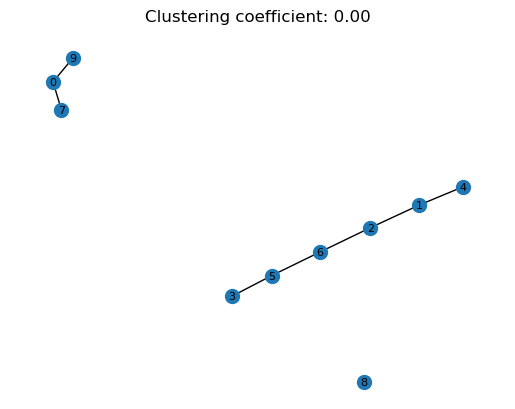

In [14]:
# Clustering coefficient = measure of the degree to which nodes in a graph tend
# to cluster together
clustering_coefficient = nx.average_clustering(graph)

# Draw the network
fig, ax = plt.subplots()
nx.draw(graph, ax=ax, with_labels=True, node_size=100, font_size=8)
ax.set_title(f"Clustering coefficient: {clustering_coefficient:.2f}")
plt.show(fig)
plt.close(fig)

### Average Shortest Path Length

The **average shortest path length** measures the efficiency of information or resource flow in a network. It is computed as:

$$L = \frac{1}{n(n-1)} \sum_{i \neq j} d(i, j)$$

where $d(i, j)$ is the shortest path distance between nodes $i$ and $j$.

- If the graph is **connected**, we compute $L$ using `networkx.average_shortest_path_length()`.
- If the graph is **disconnected**, $L$ is set to infinity.

This metric is important for understanding **network efficiency**, as lower values indicate shorter paths between nodes, improving communication and connectivity.


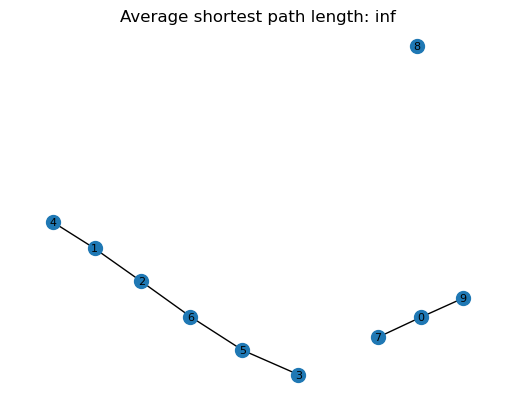

In [15]:
# Average shortest path length = average number of steps along the shortest
# paths for all possible pairs of network nodes (if the graph is connected)
if nx.is_connected(graph):
    avg_shortest_path = nx.average_shortest_path_length(graph)
else:
    avg_shortest_path = np.inf

# Draw the network
fig, ax = plt.subplots()
nx.draw(graph, ax=ax, with_labels=True, node_size=100, font_size=8)
ax.set_title(f"Average shortest path length: {avg_shortest_path:.2f}")
plt.show(fig)
plt.close(fig)

### Node Centrality: Identifying Key Nodes

**Centrality** measures the importance of a node in a network. Here, we compute the **degree centrality**, defined as:

$$C_D(v) = \frac{\deg(v)}{n - 1}$$

where:

- $\deg(v)$ is the number of connections (degree) of node $v$,
- $n$ is the total number of nodes in the graph.

The node with the highest degree centrality is often a **hub**, playing a crucial role in network connectivity. Identifying such nodes is important in network analysis, particularly in applications like social networks, epidemiology, and logistics.

The graph is displayed with the highest centrality node highlighted.


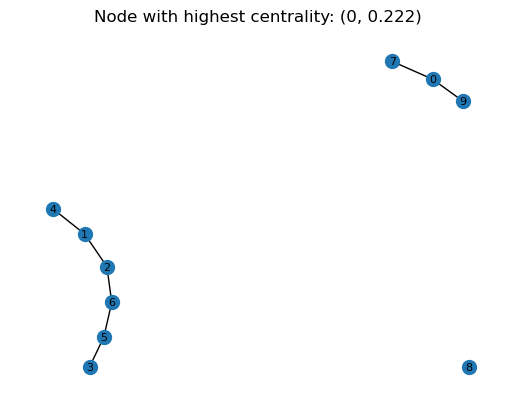

In [16]:
# Centrality = measure of the importance of a node in a network
centrality = nx.degree_centrality(graph)
# Find the node with the highest centrality
node_highest_centrality = max(centrality, key=centrality.get)
node_highest_centrality = (
    node_highest_centrality,
    round(centrality[node_highest_centrality], 3),
)

# Draw the network
fig, ax = plt.subplots()
nx.draw(graph, ax=ax, with_labels=True, node_size=100, font_size=8)
ax.set_title(f"Node with highest centrality: {node_highest_centrality}")
plt.show(fig)
plt.close(fig)

---


## Small-World Networks: Watts-Strogatz Model

A **small-world network** is characterized by:

1. **High clustering** (like regular graphs),
2. **Short average path length** (like random graphs).

The **Watts-Strogatz model** generates such graphs by:

- Starting with a **ring lattice**, where each node connects to its $k$ nearest neighbors.
- Rewiring each edge with probability $p$, introducing randomness.

Mathematically, this model exhibits:

- Clustering coefficient $C$ that remains relatively high,
- Shortest path length $L$ that quickly decreases as randomness increases.

Small-world networks are useful for modeling real-world systems like social networks, neural connections, and transportation networks.

For more details, see:

- Watts, D. J., & Strogatz, S. H. (1998). _Collective dynamics of 'small-world' networks._ Nature, **393**, 440-442.


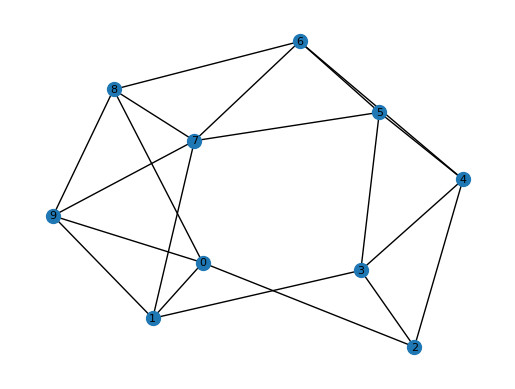

In [17]:
# SMALL WORLD GRAPH

# Number of nodes (n)
num_nodes = 10
# Probability of edge creation (p)
prob_edge = 0.2
# Number of neighbors in the small-world graph (k)
num_neighbors = 4

# Small-world graph: a graph that has the properties of a random graph and a
# regular graph
graph_small_world = nx.watts_strogatz_graph(num_nodes, num_neighbors, prob_edge)

# Draw the network
fig, ax = plt.subplots()
nx.draw(graph_small_world, ax=ax, with_labels=True, node_size=100, font_size=8)
plt.show(fig)
plt.close(fig)

## Scale-Free Networks: Barabási-Albert Model

A **scale-free network** follows a **power-law degree distribution**, meaning a few nodes (hubs) have many connections, while most have very few. This property is observed in:

- The Internet,
- Social networks,
- Biological networks.

The **Barabási-Albert (BA) model** generates a scale-free network using **preferential attachment**:

1. Start with a small number of nodes.
2. New nodes join, preferring to connect to high-degree nodes with probability:

$$P(v_i) = \frac{\deg(v_i)}{\sum_{j} \deg(v_j)}$$

This mechanism leads to **rich-get-richer** behavior.

Scale-free networks are robust to random failures but vulnerable to targeted attacks on hubs.

For more details, see:

- Barabási, A.-L., & Albert, R. (1999). _Emergence of scaling in random networks._ Science, **286**, 509-512.


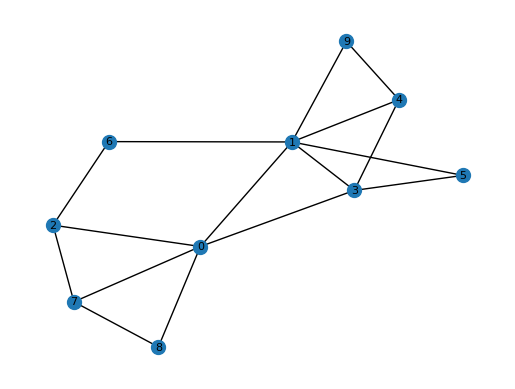

In [18]:
# SCALE-FREE GRAPH

# Number of nodes (n)
num_nodes = 10
# Number of edges to add for each new node in the scale-free graph (m)
num_edges = 2

# Scale-free graph: a graph that has a degree distribution that follows a
# power law
graph_scale_free = nx.barabasi_albert_graph(num_nodes, num_edges)

# Draw the network
fig, ax = plt.subplots()
nx.draw(graph_scale_free, ax=ax, with_labels=True, node_size=100, font_size=8)
plt.show(fig)
plt.close(fig)